In [114]:
#This notebook will show MSW effect and level crossing phenomenon in 2 flavor framework and Oscillation amplitude

Two-flavor Neutrino Oscillation Analysis:


$H_{matter}=H_{vacuum}+V=\frac{\Delta{m}^2}{2E}\begin{bmatrix} 1-\cos{2\theta} & \sin{2\theta}\\\sin{2\theta} & 1+\cos{2\theta} \end{bmatrix}+V_{cc}\begin{bmatrix} 1 &0 & \\0 &0 \end{bmatrix} 
\begin{equation}
V=\sqrt{2}G_{F}n_{e}\end{equation}$

$n_e$= Number density of electrons inside the matter


Eigenvalues of $H_{matter}: E_{1m}=\frac{V}{2}+\frac{\Delta{m}^2}{4E}(1-\sqrt((\sin^2{2\theta})+(\cos{2\theta}-A)^2)$,

$E_{2m}=\frac{V}{2}+\frac{\Delta{m}^2}{4E}(1+\sqrt((\sin^2{2\theta})+(\cos{2\theta}-A)^2)$,

A=$\frac{2EV}{\Delta{m}^2}$

$V_{cc}=\pm 7.56 \times 10^{-14}\times\frac{\rho}{gm/cm^3}\times Y_{e}$  eV, where $Y_{e}$= No of electrons/nucleon
~ 0.5 (usually taken for the caculation on Earth) 


+$V_{cc}$(neutrino) and -$V_{cc}$(antineutrino)

cc: Charged Current Interactions ($\nu_{e}e\rightarrow\nu_{e}e$)


Vacuum:

Transition Probability:
$P_{\nu_\alpha\to\nu_\beta}$ = $sin^22\theta_{v}$ $sin^2(1.27\frac{\Delta m^2}{4E}L)$ ;
Survival Probability: $P_{\nu_\alpha\rightarrow\nu_\alpha}=1-P_{\nu_\alpha\rightarrow\nu_\beta}$; 

Matter:

Transition Probability:
$P_{\nu_\alpha\to\nu_\beta}$ = $sin^22\theta_{m}$ $sin^2(1.27\frac{\Delta m^2_{m}}{4E}L)$ , Unit: L (KM), E (GeV), $\Delta m^2(eV^2)$ ; Survival Probability: $P_{\nu_\alpha\rightarrow\nu_\alpha}=1-P_{\nu_\alpha\rightarrow\nu_\beta}$

Total probability: $P_{\nu_\alpha\rightarrow\nu_\alpha}+P_{\nu_\alpha\rightarrow\nu_\beta}$= 1,     $\nu_{\alpha}\rightarrow \nu_{\beta} =\nu_{l}; l\rightarrow e,\mu,\tau $

$\Delta m^2_{m}=\Delta m^2\times{\sqrt((\sin^2{2\theta})+(\cos{2\theta}-A)^2)}$

$\Delta m^2_{m} = \Delta m^2_{2m}-\Delta m^2_{1m}$ = Mass splittings in Matter;

$\Delta m^2 = \Delta m^2_{2}-\Delta m^2_{1}$ = Mass splittings in Vacuum

$\Delta m^2_{2m}=\frac{1}{2}{\Delta m^2\times{\sqrt((\sin^2{2\theta})+(\cos{2\theta}-A)^2)}}$,
$\Delta m^2_{1m}=-\frac{1}{2}{\Delta m^2\times{\sqrt((\sin^2{2\theta})+(\cos{2\theta}-A)^2)}}$

$\sin2\theta_{m}=\frac{\sin2\theta_{v}}{\sqrt((\sin^2{2\theta})+(\cos{2\theta}-A)^2)}$ ;  $\theta_{m}$= Mixing angle in matter and $\theta_{v}= \theta$ = Mixing angle in vacuum


$\cos2\theta_{m}=\frac{\cos2\theta_{v}-A}{\sqrt((\sin^2{2\theta})+(\cos{2\theta}-A)^2)}$


$\tan2\theta_{m}=\frac{\sin2\theta_{v}}{\cos2\theta_{v}-A}$ 

Resonance Condition:  $A=\frac{2EV}{\Delta{m}^2}=\cos2\theta_{v}$

*All the expressions shown in this analysis has been derived using Neutrino Oscillation in Vacuum and Matter formalism


In [115]:
%matplotlib inline
import numpy as np
import scipy as sp
import math
from sympy import*
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp 
from scipy.integrate import odeint


In [116]:
Y_e=0.5   #Y_e~ 0.5, #rho= gm/cm^3
delta_m_sqr=8.1*1e-5                    #Unit: eV^2
E=1e9                                   #Neutrinos energy of 1 GeV considered

V=7.56*pow(10,-14)*(rho)*Y_e           #V:Matter Potential, Unit(eV)  

A=(4*E*V)/(delta_m_sqr) #my calculation  

#A=2*E*V/delta_m_sqr.  #Jochim_Kopp Version: Source diploma thesis

B=(delta_m_sqr)/(4*E)   #E= Neutrino Energy  #delta_m_sqr= Mass splittings square

                    
#s=np.sin(2*theta)
#c=np.cos(2*theta)



#for two flavor case, the Hamiltonian is 2×2 matrix , Two eigenvalues we have

def E_1m(rho):  
 
    # E_1m: Energy eigenvalues of the Hamiltonian in Matter 
    #E_1m=(V/2)+(B*(1-np.sqrt(s**2+(c-A)**2)))  "Jochim Kopp version"        
                                            
    E_1m=B*(A + 2)/2 - B*np.sqrt(A**2 - 8*A*np.cos(theta)**2 + 4*A + 4)/2 #My calculation
    
    # E_1mn: Energy eigenvalues of the Hamiltonian in Matter including NSI term
    
    #E_1mn=B*(A + D + 2)/2 - B*np.sqrt(-4*(A + 2*np.sin(theta)**2)*(D + np.cos(2*theta) + 1) + 4*(C + np.sin(2*theta))**2 + (A + D + 2)**2)/2
    
    return E_1m

def E_2m(rho):
    
    #Energy eigenvalues of the Hamiltonian in Matter
    
    #E_2m=(V/2)+(B*(1+np.sqrt(s**2+(c-A)**2)))  #Jochim Kopp version
    
    E_2m= B*(A + 2)/2 + B*np.sqrt(A**2 - 8*A*np.cos(theta)**2 + 4*A + 4)/2 #My calculation
    
    return E_2m                              

def Amplitude(theta):
    
    s=np.sin(2*theta)
    c=np.cos(2*theta)
    return (s**2)/((s**2)+(c-A)**2)   # Oscillation Amplitude in Matter 

In [117]:
rho=np.linspace(0.1,20,100)  #Matter density in gm/cm^3  

                              #Adiabatic Approximation( slowly varying density in medium)
                       

In [118]:
theta=np.arcsin(np.sqrt(0.79))/2

In [119]:
theta

0.547381254366787

In [120]:
E_1m(rho)

array([2.68345163e-15, 7.58583610e-15, 1.17383809e-14, 1.50979157e-14,
       1.77176704e-14, 1.97195131e-14, 2.12436579e-14, 2.24136831e-14,
       2.33250585e-14, 2.40471149e-14, 2.46290443e-14, 2.51056658e-14,
       2.55018292e-14, 2.58355071e-14, 2.61198993e-14, 2.63648544e-14,
       2.65778344e-14, 2.67645762e-14, 2.69295508e-14, 2.70762871e-14,
       2.72076032e-14, 2.73257736e-14, 2.74326525e-14, 2.75297653e-14,
       2.76183778e-14, 2.76995479e-14, 2.77741671e-14, 2.78429908e-14,
       2.79066637e-14, 2.79657389e-14, 2.80206937e-14, 2.80719420e-14,
       2.81198442e-14, 2.81647159e-14, 2.82068343e-14, 2.82464441e-14,
       2.82837618e-14, 2.83189799e-14, 2.83522701e-14, 2.83837857e-14,
       2.84136645e-14, 2.84420304e-14, 2.84689949e-14, 2.84946592e-14,
       2.85191146e-14, 2.85424446e-14, 2.85647247e-14, 2.85860240e-14,
       2.86064059e-14, 2.86259281e-14, 2.86446438e-14, 2.86626019e-14,
       2.86798473e-14, 2.86964216e-14, 2.87123630e-14, 2.87277072e-14,
      

In [121]:
y11=E_1m(rho)

In [122]:
E_2m(rho)

array([4.15965484e-14, 4.42923457e-14, 4.77379827e-14, 5.19766298e-14,
       5.69550569e-14, 6.25513960e-14, 6.86254330e-14, 7.50535896e-14,
       8.17403960e-14, 8.86165215e-14, 9.56327739e-14, 1.02754334e-13,
       1.09956353e-13, 1.17220857e-13, 1.24534646e-13, 1.31887873e-13,
       1.39273075e-13, 1.46684515e-13, 1.54117722e-13, 1.61569167e-13,
       1.69036033e-13, 1.76516045e-13, 1.84007348e-13, 1.91508416e-13,
       1.99017986e-13, 2.06534998e-13, 2.14058560e-13, 2.21587918e-13,
       2.29122427e-13, 2.36661534e-13, 2.44204761e-13, 2.51751694e-13,
       2.59301974e-13, 2.66855284e-13, 2.74411348e-13, 2.81969920e-13,
       2.89530784e-13, 2.97093747e-13, 3.04658639e-13, 3.12225305e-13,
       3.19793608e-13, 3.27363424e-13, 3.34934641e-13, 3.42507159e-13,
       3.50080885e-13, 3.57655737e-13, 3.65231639e-13, 3.72808521e-13,
       3.80386321e-13, 3.87964981e-13, 3.95544447e-13, 4.03124671e-13,
       4.10705607e-13, 4.18287215e-13, 4.25869455e-13, 4.33452293e-13,
      

In [123]:
y22=E_2m(rho)

In [124]:
theta=np.arcsin(np.sqrt(0.01))/2

In [125]:
theta

0.0500837105807799

In [126]:
y1=E_1m(rho) #for theta 0.0500837105807799

In [127]:
y2=E_2m(rho) #0.0500837105807799

MSW effect and level crossing phenomenon:

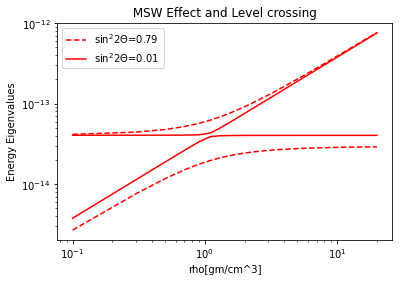

In [128]:
plt.loglog(rho,y11,"r--",label="$\sin^2{2\Theta}$=0.79")
plt.loglog(rho,y22,"r--")
plt.loglog(rho,y1,"r-",label="$\sin^2{2\Theta}$=0.01")
plt.loglog(rho,y2,"r-")
plt.xlabel("rho[gm/cm^3]")
plt.ylabel("Energy Eigenvalues")
plt.title(" MSW Effect and Level crossing ",loc="center")
plt.legend()

Oscillation Amplitude revisit:

In [129]:
theta=np.arcsin(np.sqrt(0.01))/2

In [130]:
Z2=Amplitude(theta)

In [131]:
theta=np.arcsin(np.sqrt(0.79))/2

In [132]:
Z1=Amplitude(theta)

In [133]:
theta=np.arcsin(np.sqrt(0.01))/2  #sin^2theta=Oscillation Amplitude in vacuum

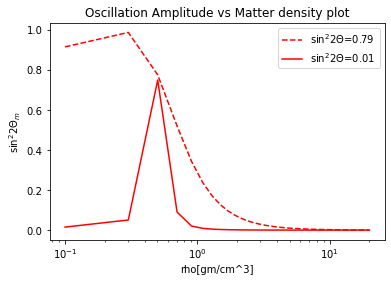

In [134]:
plt.semilogx(rho, Z1, "r--",label="$\sin^2{2\Theta}$=0.79")
plt.semilogx(rho,Z2, "r-", label="$\sin^2{2\Theta}$=0.01")
plt.xlabel("rho[gm/cm^3]")
plt.ylabel("$\sin^2{2\Theta}_m$")
plt.legend(loc="upper right")
plt.title("Oscillation Amplitude vs Matter density plot")
plt.show()